<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0


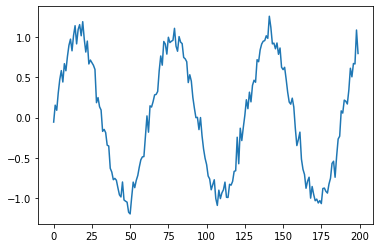

In [2]:
# make the noisy sin wave data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [3]:
# build the dataset
# let's see if we can use T past values to predict the next value

T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (190, 10) Y.shape: (190,)


In [0]:
# split the dataset
# in time series, train & test dataset shouldn't be split randomly
x_train = X[:-N//2]
y_train = Y[:-N//2]
x_test = X[-N//2:]
y_test = Y[-N//2:]

In [0]:
# build autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss="mse", optimizer=Adam(0.1))

In [6]:
# train rnn
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 9ms/sample - loss: 1.2357 - val_loss: 0.4453
Epoch 2/80
95/95 [==============================] - 0s 299us/sample - loss: 0.6958 - val_loss: 0.6332
Epoch 3/80
95/95 [==============================] - 0s 290us/sample - loss: 0.4132 - val_loss: 0.2037
Epoch 4/80
95/95 [==============================] - 0s 278us/sample - loss: 0.1933 - val_loss: 0.2378
Epoch 5/80
95/95 [==============================] - 0s 289us/sample - loss: 0.2655 - val_loss: 0.0942
Epoch 6/80
95/95 [==============================] - 0s 362us/sample - loss: 0.0659 - val_loss: 0.0738
Epoch 7/80
95/95 [==============================] - 0s 284us/sample - loss: 0.0932 - val_loss: 0.0950
Epoch 8/80
95/95 [==============================] - 0s 286us/sample - loss: 0.0824 - val_loss: 0.0497
Epoch 9/80
95/95 [==============================] - 0s 310us/sample - loss: 0.0521 - val_loss: 0.1193
Epoch 10/80
95/95 [=====================

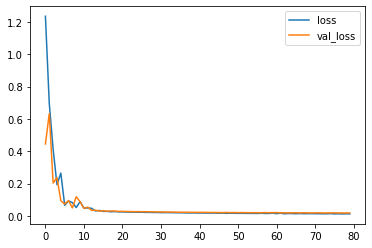

In [7]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

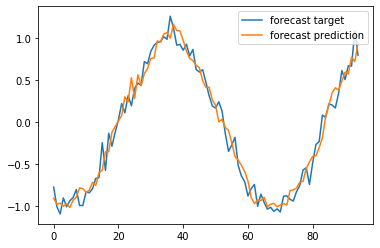

In [8]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

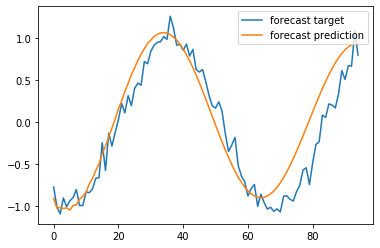

In [9]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()